# **IBM HR Employee Attrition Dataset**  
**Data Visualization**
---
 
---
Here, data will be explored through visualization to better understand the relationship between attrition and other variables.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

file_path = Path("C:/Users/selo/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Text(0.5, 1.0, 'Dist. of Attrition')

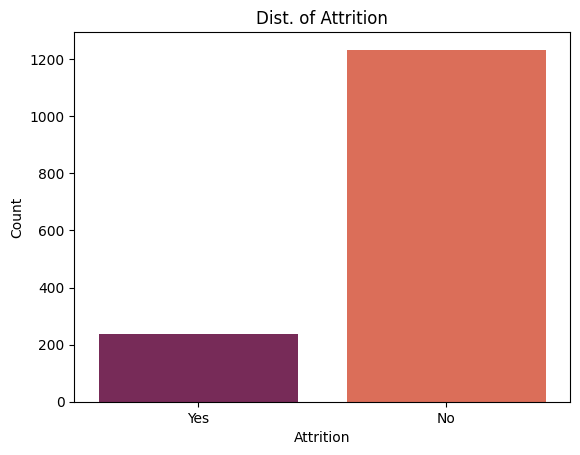

In [2]:
sns.countplot(x='Attrition',hue='Attrition', data=df, palette='rocket')

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Dist. of Attrition')

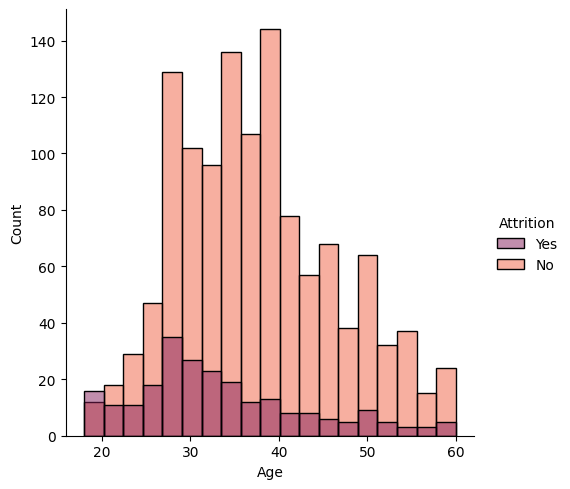

In [3]:
sns.displot(x='Age', hue='Attrition', data=df, palette='rocket')

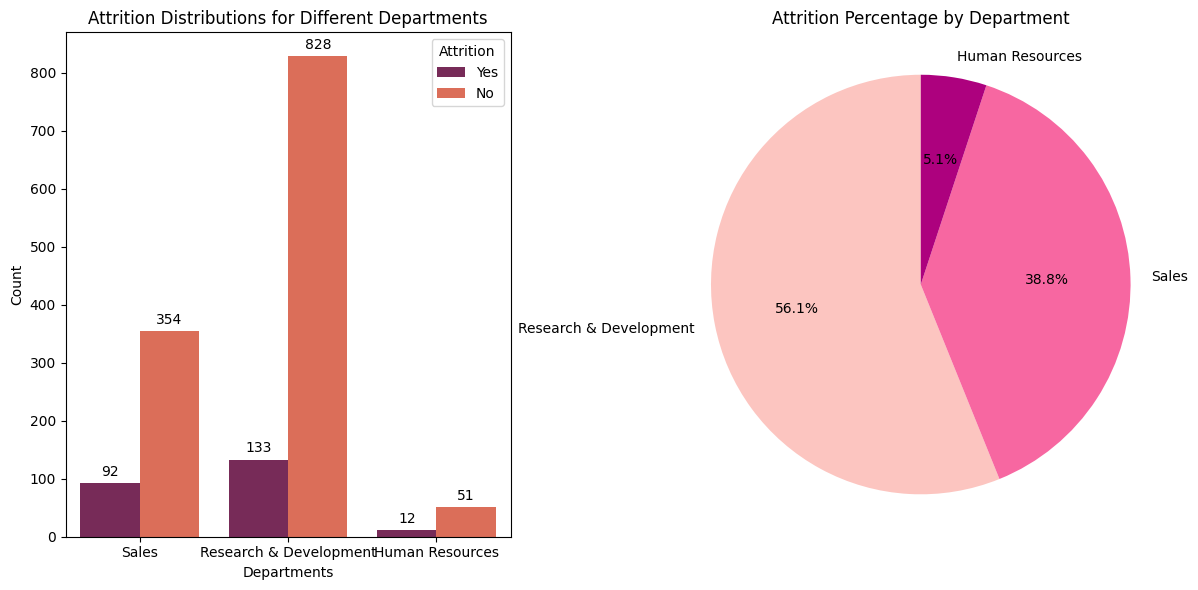

In [4]:
df_att_yes = df[df['Attrition'] == 'Yes']

fig = plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Count plot
sns.countplot(data=df, x='Department',hue='Attrition', ax=ax0, palette='rocket')
ax0.set_xlabel('Departments')
ax0.set_ylabel('Count')
ax0.set_title('Attrition Distributions for Different Departments')
for bars in ax0.containers:
        ax0.bar_label(bars, fmt='%d', label_type='edge', padding=3)

# Subplot 2: Pie chart
dep_attrition = df_att_yes['Department'].value_counts()
ax1.pie(dep_attrition, labels=dep_attrition.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('RdPu',3))
ax1.set_title('Attrition Percentage by Department')
ax1.axis('equal')

plt.tight_layout()
plt.show()



In [5]:
#Defining a function to easily generate distribution plots by categorical values.
#Just defined a function to plot distributions above.
df_att_yes = df[df['Attrition'] == 'Yes']

def att_dist_plot(df, x_col, hue_col):
    
    fig = plt.figure(figsize=(12, 6))

    ax0 = fig.add_subplot(1, 2, 1)
    ax1 = fig.add_subplot(1, 2, 2)
# Subplot 1: Count plot
    sns.countplot(data=df, x=x_col, hue=hue_col, ax=ax0, palette='rocket')
    ax0.set_xlabel(hue_col)
    ax0.set_ylabel('Count')
    ax0.set_title(f'{hue_col} Distributions for {x_col}')
    for bars in ax0.containers:
        ax0.bar_label(bars, fmt='%d', label_type='edge', padding=3)
# Subplot 2: Pie Chart of Attrition Distributon by Categories:
    df_att_yes = df[df['Attrition'] == 'Yes']
    dep_attrition = df_att_yes[x_col].value_counts()
    ax1.pie(dep_attrition, labels=dep_attrition.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('RdPu',3))
    ax1.set_title(f'Attrition Percentage by {x_col}')
    ax1.axis('equal')

    
    plt.tight_layout()
    plt.show()


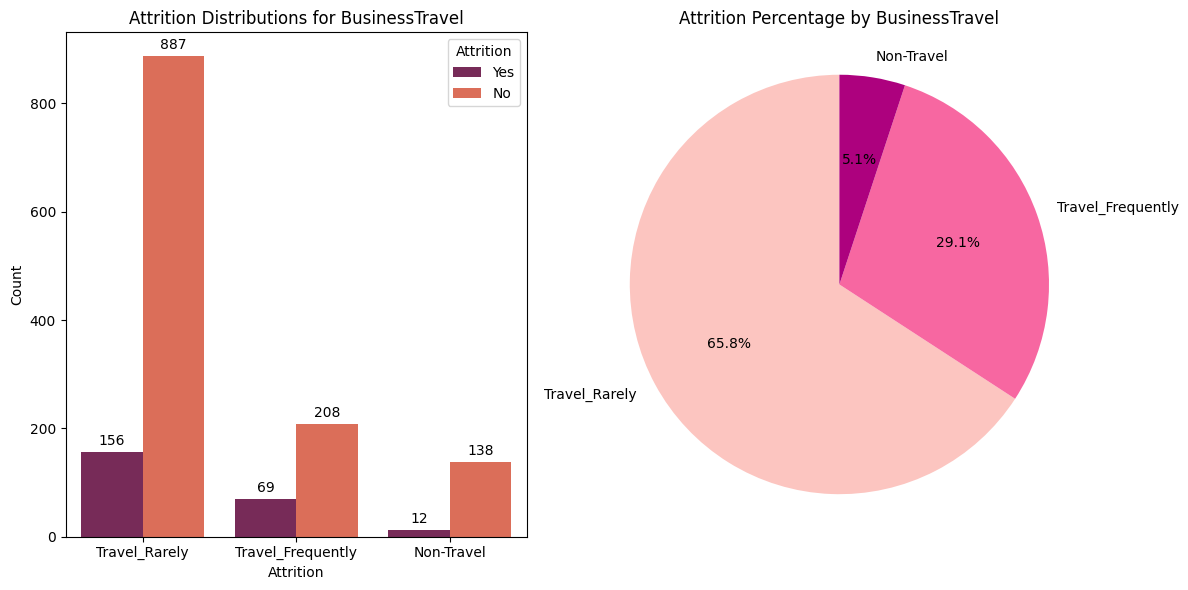

In [6]:
att_dist_plot(df, x_col='BusinessTravel', hue_col='Attrition')

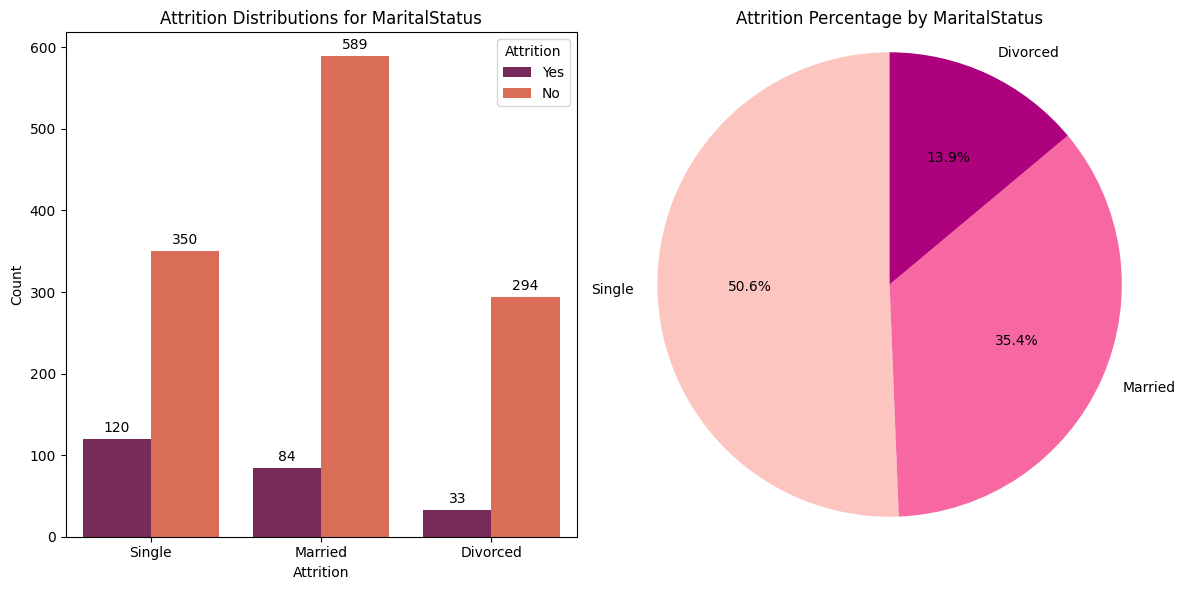

In [10]:
att_dist_plot(df, x_col='MaritalStatus', hue_col='Attrition')